In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


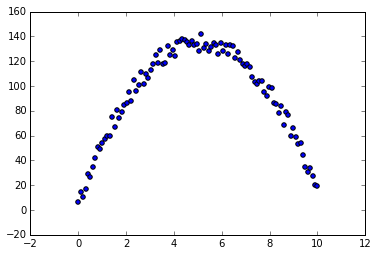

In [2]:
data = np.loadtxt('movimiento.dat')
scatter(data[:,0], data[:,1])

In [46]:
def f(t,a,b,c):
    return a*t**2 + b * t + c

def likelihood(Data, Model, Weight):
    chi2 = 0
    for i in range(Data.size):
        chi2 += (Data[i]-Model[i])**2 / Weight[i]
    return exp(-chi2), chi2

a = -5
b = 50
c = 0

Data   = data[:,1]
T      = data[:,0]
Model  = f(T,a,b,c)
Weight = np.ones(Data.size) 

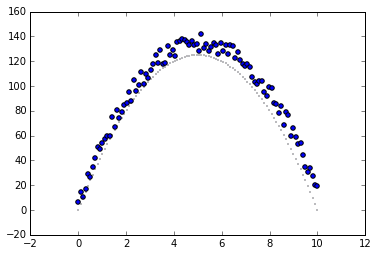

In [47]:
scatter(T,Data)
scatter(T,Model,s=0.1)

In [48]:
L = likelihood(Data,Model,Weight)

N = 50000

MCMC_steps = []

for step in range(N):
    a_new = np.random.normal(a,1.)
    b_new = np.random.normal(b,2.)
    c_new = np.random.normal(c,1.)
    
    Model_new = f(T,a_new,b_new,c_new)
    Weight    = np.ones(Data.size) 
    
    L_new = likelihood(Data,Model_new,Weight)
    
    if ( L_new[1]/L[1] <1 ):
        a = a_new
        b = b_new
        c = c_new   
    else:
        p = random.rand(1)[0]
        if ( exp( - L_new[1]+L[1] )> p):
            a = a_new
            b = b_new
            c = c_new
    MCMC_steps.append([a,b,c, L_new[1]])

In [49]:
MCMC_steps = np.array(MCMC_steps)

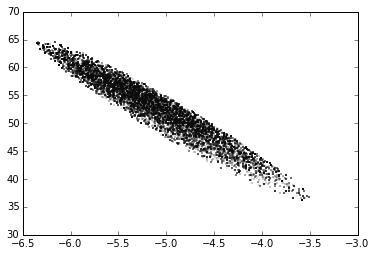

In [50]:
scatter( MCMC_steps[:,0], MCMC_steps[:,1], s=0.01)

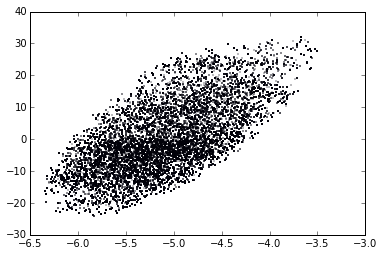

In [51]:
scatter( MCMC_steps[:,0], MCMC_steps[:,2], s=0.1)

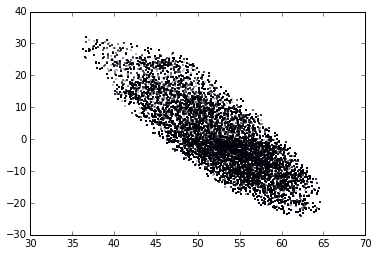

In [52]:
scatter( MCMC_steps[:,1], MCMC_steps[:,2], s=0.1)

In [53]:
L_walk = MCMC_steps[:,3]


exp(0.5) * amin(L_walk)

3074.8912241813873

In [54]:
#index = where(L_walk < exp(1.5) * amin(L_walk) )[0]
index = where(L_walk > 0)[0]
index.size

50000

(50000, 2)


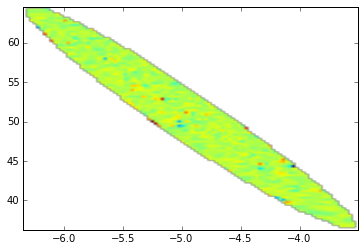

In [55]:
a_walk = MCMC_steps[index,0]
b_walk = MCMC_steps[index,1]
c_walk = MCMC_steps[index,2]
l_walk = MCMC_steps[index,3]


min_a = amin(a_walk)
max_a = amax(a_walk)
min_b = amin(b_walk)
max_b = amax(b_walk)
min_c = amin(c_walk)
max_c = amax(c_walk)

grid_a, grid_b = mgrid[min_a:max_a:100j, min_b:max_b:100j]


from scipy.interpolate import griddata
n_points = index.size
points = ones((n_points,2))
print shape(points)
points[:,0] = a_walk[:]
points[:,1] = b_walk[:]
grid_l = griddata(points, -log(l_walk/amin(l_walk)), (grid_a, grid_b), method='cubic')
imshow(grid_l.T, extent=(min_a,max_a,min_b,max_b), aspect='auto',origin='lower')



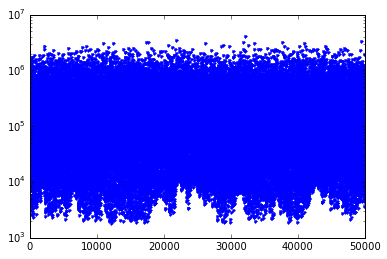

In [56]:
plot(L_walk, '.')
yscale('log')

(array([ 2124.,  5224.,  7082.,  9012.,  8277.,  7368.,  5204.,  3429.,
         1736.,   544.]),
 array([-6.34833947, -6.06436299, -5.78038651, -5.49641003, -5.21243355,
        -4.92845707, -4.64448059, -4.36050412, -4.07652764, -3.79255116,
        -3.50857468]),
 <a list of 10 Patch objects>)

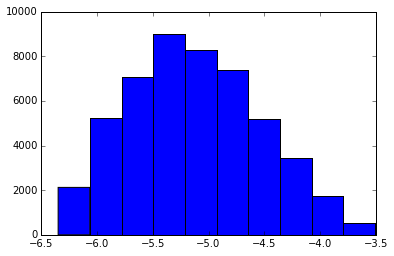

In [57]:
hist(a_walk)

(array([  472.,  1315.,  3262.,  4645.,  7009.,  8294.,  8913.,  8529.,
         5421.,  2140.]),
 array([ 36.26093678,  39.0952378 ,  41.92953883,  44.76383985,
         47.59814087,  50.4324419 ,  53.26674292,  56.10104395,
         58.93534497,  61.769646  ,  64.60394702]),
 <a list of 10 Patch objects>)

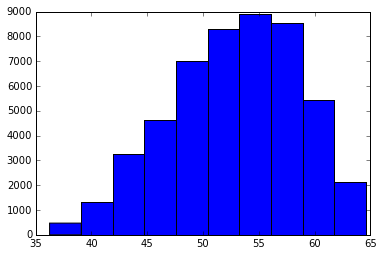

In [58]:
hist(b_walk)

(array([  2074.,   5002.,   8033.,  10852.,   7771.,   5751.,   4835.,
          2873.,   2241.,    568.]),
 array([-24.0116179 , -18.40188406, -12.79215023,  -7.18241639,
         -1.57268255,   4.03705128,   9.64678512,  15.25651896,
         20.8662528 ,  26.47598663,  32.08572047]),
 <a list of 10 Patch objects>)

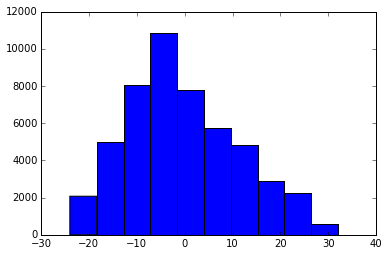

In [59]:
hist(c_walk)

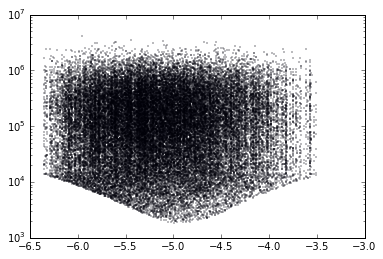

In [60]:
scatter(a_walk,l_walk, s=0.1)
yscale('log')

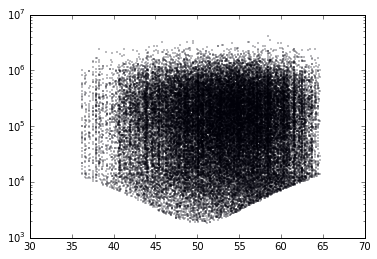

In [61]:
scatter(b_walk,l_walk, s=0.1)
yscale('log')

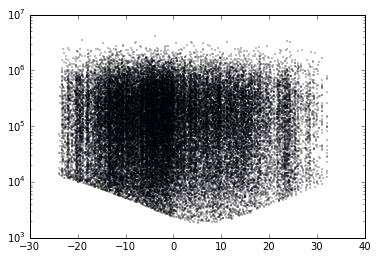

In [62]:
scatter(c_walk,l_walk, s=0.1)
yscale('log')

In [74]:
amin(l_walk)

1860.913262013001

In [75]:
indx = where( l_walk == amin(l_walk))

In [76]:
a_walk[indx]

array([-4.92363703])

In [77]:
b_walk[indx]

array([ 50.43211372])

In [78]:
c_walk[indx]

array([ 6.44007162])

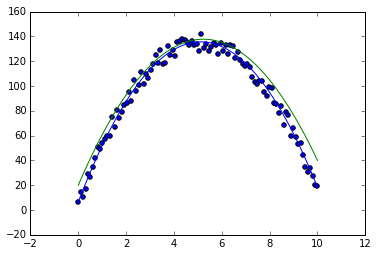

In [79]:
scatter(T,Data)
plot(T,f(T,a_walk[indx], b_walk[indx], c_walk[indx]))
plot(T,f(T,-4.3, 45, 20 ))

#Now Integrate

In [57]:
min_c

-16.78413868181034

In [58]:
max_c

29.869623899237251